In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import manifold
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn.decomposition import PCA

from time import time

In [2]:
"""
By doing this file, we can finally seperate original dataset into test and train dataset 

"""


'\nBy doing this file, we can finally seperate original dataset into test and train dataset \n\n'

# Data Visualization

In [16]:
df = pd.read_csv('~/D2K_BCM_DATASET/batchcorrected_log2cpm.tsv', sep='\t',index_col=0)
#df.set_index(df["Unnamed: 0"], inplace=True)
df.head()

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
ENSG00000000003,4.224093,4.088110,4.108960,4.338494,4.144095,3.961678,4.068081,4.181222,4.177308,4.345819,...,4.095915,4.185599,3.984862,4.437899,4.258712,3.980472,4.310913,4.078538,4.171295,4.225876
ENSG00000000419,4.273573,4.278318,4.508365,4.533990,4.451600,4.437512,4.229555,4.359195,4.299986,4.569697,...,4.615619,4.413496,4.623100,4.781393,4.534774,4.570218,4.722600,4.492435,4.560072,4.415542
ENSG00000000457,4.716466,4.969749,4.852762,4.947713,4.882771,4.704028,4.675137,4.517319,4.740297,4.672500,...,4.700506,4.839435,4.763086,4.870351,4.876640,4.812464,4.812821,4.840323,4.880159,4.652706
ENSG00000000460,4.126170,4.528228,4.286024,4.310150,4.150902,4.265058,4.737984,4.102466,4.593532,4.613472,...,4.476497,4.568329,4.556887,4.323269,4.165587,4.667403,4.378113,4.334682,4.361387,3.685774
ENSG00000000938,1.171196,0.862429,1.540143,1.105556,1.375205,1.568452,1.638125,1.233508,1.497463,1.548793,...,1.454494,0.874062,1.199031,2.341509,1.732493,1.523060,1.136348,1.578141,0.897523,1.096682


In [17]:
#transpose the dataframe --> make genes as dementions 
dfn = df.T
dfn['mgs_level'] = 0
dfn.reset_index(inplace = True)
list = dfn['index'].apply(lambda x:x[-1]).tolist()
#list 
dfn['mgs_level'] = list
level = dfn.pop('mgs_level')
dfn.insert(1,'mgs_level',level)
#dfn.head()

# t-SNE

In [18]:
#.set_xlabel('temp',fontsize=18,labelpad = 12.5)
test = dfn.drop(['index', 'mgs_level'], axis=1)
test.head()
#train = test.values
Y = TSNE(n_components = 2).fit_transform(test)
dfn['tsne-2d-one'] = Y[:,0]
dfn['tsne-2d-two'] = Y[:,1]

Text(0, 0.5, 'tSNE2')

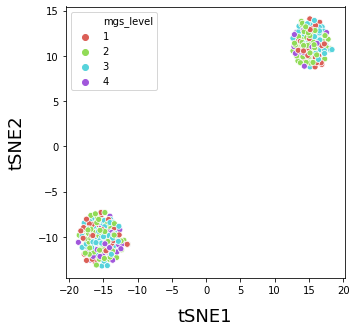

In [21]:
plt.figure(figsize = (5,5))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "mgs_level",
    palette = sns.color_palette("hls", 4),
    data = dfn
)
fig.set_xlabel('tSNE1',fontsize=18,labelpad = 12.5)
fig.set_ylabel('tSNE2',fontsize=18,labelpad = 12.5)
#fig.figure.savefig("tsne-2d.png",dpi = 300)

# Find why two big cluster:

In [24]:
#load other dataset contains more info
retina = pd.read_csv('~/D2K_BCM_DATASET/meta_retina.csv', index_col = [0])
sub_retina = pd.DataFrame(retina,columns = ['age','sex','rna_isolation_batch','library_prepper'])
cleaned = pd.read_csv('~/D2K_BCM_DATASET/batchcorrected_log2cpm.tsv', sep = '\t', index_col = [0])
cleaned = cleaned.transpose()
#merge two frame 
df = sub_retina.join(cleaned)
#df.shape -- (523,18057)
df.head()

,age,sex,rna_isolation_batch,library_prepper,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283529,ENSG00000283536,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674
r_id,,,,,,,,,,,,,,,,,,,,,
1_2,61.0,M,isobatch1,MRS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2_1,77.0,F,isobatch1,RRP,3.893898,4.235433,5.053473,4.289574,0.458265,4.191310,...,0.935627,3.143562,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601
3_1,81.0,F,isobatch1,RRP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4_1,88.0,F,isobatch1,RRP,4.084395,4.574944,4.862087,4.481557,1.373639,4.148119,...,0.968367,2.428970,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704
5_1,75.0,F,isobatch1,RRP,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
#drop rows with NaN to clean the dataframe
fclean = df.dropna(axis=0,how='any')
fclean.shape # --(453,18057 )
#fclean.head()

(453, 18057)

In [26]:
test = fclean.drop(['age','sex','rna_isolation_batch','library_prepper'],axis = 1)
Y = TSNE(n_components = 2).fit_transform(test)
#Y.shape
fclean['tsne-2d-one'] = Y[:,0]
fclean['tsne-2d-two'] = Y[:,1]
fclean.head()

/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/perception/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,age,sex,rna_isolation_batch,library_prepper,ENSG00000000003,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,...,ENSG00000283590,ENSG00000283617,ENSG00000283619,ENSG00000283623,ENSG00000283633,ENSG00000283662,ENSG00000283667,ENSG00000283674,tsne-2d-one,tsne-2d-two
r_id,,,,,,,,,,,,,,,,,,,,,
2_1,77.0,F,isobatch1,RRP,3.893898,4.235433,5.053473,4.289574,0.458265,4.191310,...,2.020566,1.802165,1.764533,0.770119,0.458132,0.343835,1.113595,2.081601,5.937076,-22.478586
4_1,88.0,F,isobatch1,RRP,4.084395,4.574944,4.862087,4.481557,1.373639,4.148119,...,1.861104,2.546175,0.992152,1.681286,0.469025,0.331966,1.360341,1.816704,7.507745,-20.224785
6_1,73.0,F,isobatch1,RRP,4.005586,4.221508,4.873337,4.534734,1.018128,3.889556,...,1.760205,1.595835,1.479032,0.655234,0.453184,0.416525,1.006575,2.395712,12.056872,-23.026878
7_3,89.0,F,isobatch1,RRP,4.333073,4.445611,4.935690,4.307946,0.923342,3.173271,...,1.896118,1.443367,1.156595,1.719645,0.867212,0.728676,1.129318,1.712396,9.338912,-22.093786
8_2,72.0,F,isobatch1,MRS,4.322620,4.428162,4.772258,3.835178,1.740931,4.706419,...,1.461530,1.832377,1.285442,1.506791,0.650473,0.280057,1.415718,1.392421,9.046632,-22.289948


Text(0, 0.5, 'tSNE2')

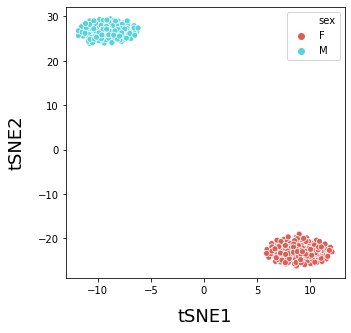

In [32]:
#change the hue name: sex, rna_isolation_batch,library_prepper to see different figure
plt.figure(figsize = (5,5))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "sex",
    palette = sns.color_palette("hls", 2),
    data = fclean
)
fig.set_xlabel('tSNE1',fontsize=18,labelpad = 12.5)
fig.set_ylabel('tSNE2',fontsize=18,labelpad = 12.5)

# MERGE ANNOTATION.TSV and REMOVE X,Y

In [34]:
#load data
merge = pd.read_csv('~/D2K_BCM_DATASET/batchcorrected_log2cpm.tsv', sep='\t',index_col=0)
anno = pd.read_csv('~/D2K_BCM_DATASET/AnnotationFile.tsv', sep = '\t', index_col = [0])

#remove x%y chrmosomes
anno = anno[anno.chromosome_name != 'X']
anno = anno[anno.chromosome_name != 'Y']

#merge annotation dataset and batch correction datset 
both = merge.join(anno)#(18053,460)
both= both.dropna(axis=0,how='any')
both.shape # (17421,460)
both.head()

#create a clean data frame
cleandf = both.drop(['external_gene_name','chromosome_name','start_position','end_position','strand','gene_length','gene_biotype'],axis = 1)
cleandf.head() #final: (17421, 453) vs original : (18053, 453)
#add a mgs_level for clean dataframe
ndf = cleandf.T
ndf['MGS_LEVEL'] = 0
#ndf.head()

#merge dataset with meta_retina  info
test = sub_retina.join(ndf)
test = test.dropna(axis = 0, how = 'any')

new = pd.DataFrame()
new = ndf.reset_index()

mlist = new ['index'].apply(lambda x:x[-1]).tolist()
test['MGS_LEVEL'] = mlist
level = test.pop('MGS_LEVEL')
test.insert(0,'MGS_LEVEL',level)
#test.head()

#get the final clean dataset 
cleantest = test.drop(['MGS_LEVEL','age','sex','rna_isolation_batch','library_prepper'],axis = 1)


# call t-SNE again

In [35]:
Y = TSNE(n_components = 2).fit_transform(cleantest)
test['tsne-2d-one'] = Y[:,0]
test['tsne-2d-two'] = Y[:,1]

Text(0, 0.5, 'tSNE2')

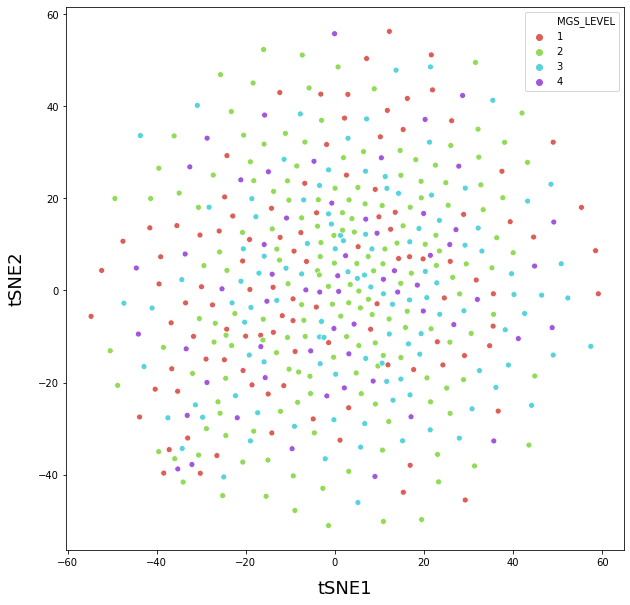

In [37]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "MGS_LEVEL",
    palette = sns.color_palette("hls", 4),
    data = test
)
fig.set_xlabel('tSNE1',fontsize=18,labelpad = 12.5)
fig.set_ylabel('tSNE2',fontsize=18,labelpad = 12.5)

# Import new data to do the preprocessing

In [38]:
# load data
df = pd.read_csv('~/D2K_BCM_DATASET/genelevel_rsem_expectedcounts_byrid_nooutliers.counts.matrix.tsv', sep='\t',index_col=0)
df.head() #(58051, 453)

,100_2,101_3,102_2,103_3,104_2,105_2,106_4,107_4,109_1,11_4,...,90_2,91_2,92_3,93_2,94_4,95_4,96_3,97_2,98_3,99_1
ENSG00000000003,225.00,252.0,136.0,166.0,207.0,121.0,127.0,304.0,227.0,224.0,...,132.0,149.0,186.0,71.0,272.0,136.0,324.0,158.0,168.0,167.0
ENSG00000000005,0.00,0.0,1.0,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,0.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,0.0
ENSG00000000419,254.00,301.0,173.0,264.0,307.0,140.0,164.0,279.0,216.0,274.0,...,369.0,148.0,265.0,86.0,326.0,283.0,300.0,242.0,286.0,207.0
ENSG00000000457,422.99,510.0,272.0,301.0,417.0,116.0,198.0,278.0,243.0,297.0,...,274.0,163.0,227.0,96.0,418.0,338.0,277.0,342.0,343.0,140.0
ENSG00000000460,272.00,310.0,204.0,224.0,227.0,149.0,253.0,171.0,274.0,198.0,...,280.0,168.0,308.0,86.0,284.0,260.0,179.0,210.0,225.0,124.0


In [39]:
ndf = df.T
ndf['MGS_LEVEL'] = 0
ndf.head()

,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,ENSG00000001167,...,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699,MGS_LEVEL
100_2,225.0,0.0,254.0,422.99,272.0,21.0,165.00,107.0,449.0,757.0,...,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0
101_3,252.0,0.0,301.0,510.00,310.0,12.0,178.96,150.0,624.0,872.0,...,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0
102_2,136.0,1.0,173.0,272.00,204.0,21.0,111.49,94.0,219.0,643.0,...,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0
103_3,166.0,4.0,264.0,301.00,224.0,11.0,181.77,78.0,583.0,698.0,...,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0
104_2,207.0,0.0,307.0,417.00,227.0,16.0,244.00,114.0,499.0,627.0,...,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,0


In [40]:
new = pd.DataFrame()
new = ndf.reset_index()
#new.head()

In [41]:
mlist = new ['index'].apply(lambda x:x[-1]).tolist()
ndf['MGS_LEVEL'] = mlist
level = ndf.pop('MGS_LEVEL')
ndf.insert(0,'MGS_LEVEL',level)
ndf.head()

,MGS_LEVEL,ENSG00000000003,ENSG00000000005,ENSG00000000419,ENSG00000000457,ENSG00000000460,ENSG00000000938,ENSG00000000971,ENSG00000001036,ENSG00000001084,...,ENSG00000283690,ENSG00000283691,ENSG00000283692,ENSG00000283693,ENSG00000283694,ENSG00000283695,ENSG00000283696,ENSG00000283697,ENSG00000283698,ENSG00000283699
100_2,2,225.0,0.0,254.0,422.99,272.0,21.0,165.00,107.0,449.0,...,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
101_3,3,252.0,0.0,301.0,510.00,310.0,12.0,178.96,150.0,624.0,...,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
102_2,2,136.0,1.0,173.0,272.00,204.0,21.0,111.49,94.0,219.0,...,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
103_3,3,166.0,4.0,264.0,301.00,224.0,11.0,181.77,78.0,583.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
104_2,2,207.0,0.0,307.0,417.00,227.0,16.0,244.00,114.0,499.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0


# Make sure no batch effect left

In [42]:
Y = TSNE(n_components = 2).fit_transform(ndf)
ndf['tsne-2d-one'] = Y[:,0]
ndf['tsne-2d-two'] = Y[:,1]

Text(0, 0.5, 'tSNE2')

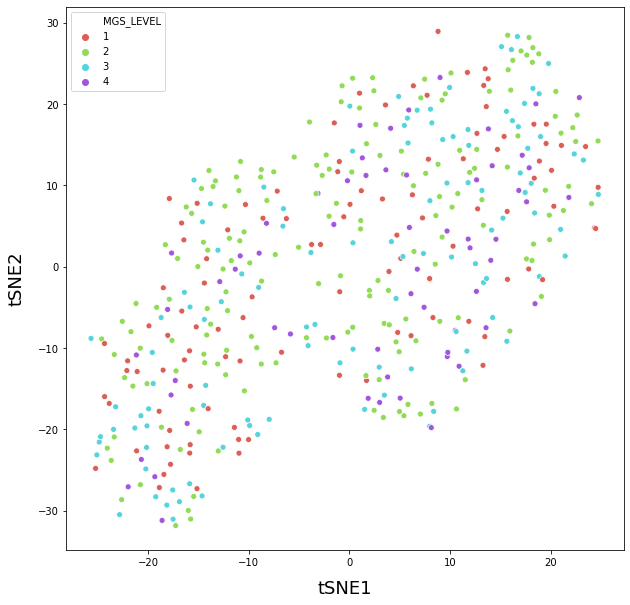

In [43]:
plt.figure(figsize = (10,10))
fig = sns.scatterplot(
    x = "tsne-2d-one", y ="tsne-2d-two", hue = "MGS_LEVEL",
    palette = sns.color_palette("hls", 4),
    data = ndf
)
fig.set_xlabel('tSNE1',fontsize=18,labelpad = 12.5)
fig.set_ylabel('tSNE2',fontsize=18,labelpad = 12.5)

# Split train and test dataset 9:1

In [7]:
from sklearn.model_selection import train_test_split

#split dataset into train and test dataset
X, y = ndf.iloc[:,1:], ndf.iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

#shape of train and test
X_train.shape, y_train.shape # ((407, 58051), (407,))
X_test.shape, y_test.shape #((46, 58051), (46,))

((46, 58051), (46,))

In [8]:
result = X_train.T
result.head()

,205_2,251_1,474_3,178_4,313_1,484_4,288_1,106_4,215_2,184_3,...,330_2,11_4,480_1,314_1,371_3,443_2,311_1,225_2,150_4,289_2
ENSG00000000003,273.0,192.0,170.0,157.0,192.0,279.0,160.0,127.0,209.0,159.0,...,180.0,224.0,166.0,237.0,191.0,263.0,184.0,186.0,401.0,101.0
ENSG00000000005,1.0,1.0,1.0,3.0,2.0,1.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0
ENSG00000000419,202.0,243.0,230.0,270.0,232.0,231.0,174.0,164.0,244.0,207.0,...,257.0,274.0,230.0,327.0,252.0,285.0,237.0,223.0,278.0,159.0
ENSG00000000457,261.0,369.0,355.0,375.0,317.0,273.0,254.0,198.0,229.0,344.0,...,335.0,297.0,348.0,389.0,461.0,272.0,419.0,376.0,312.0,380.0
ENSG00000000460,194.0,188.0,234.0,236.0,385.0,154.0,144.0,253.0,218.0,214.0,...,331.0,198.0,192.0,274.0,251.0,322.0,364.0,129.0,322.0,252.0


In [9]:
result.to_csv("./train_genelevel_90%.tsv", sep='\t')

In [10]:
result2= X_test.T
result2.shape

(58051, 46)

In [11]:
result2.to_csv("./test_genelevel_10%.tsv", sep='\t')
result2.shape()